## Goal

The goal of this exercise is to use linear algebra, specifically orthogonal projections, to define a best fit line using the **least squares method.** 

How are we going to do this?

Given a vector x ∈ R^n if we project it onto a subspace U (U subset of R^n) then this vector, x, is now permenantly in the subspace U. There are three questions we want to answer to figure out the final **line of best fit.** Before I share these we can acknowledge that we know every subspace has a basis. Therefore the first thing we want to find are the coordinates that multiply by the basis vectors in the subspace to give us the vector that was projected from higher dimensions which I'll call λ . 

Let's call the vector that was in R^n, mu(x). This vector is now in the subspace. We need to find the coordinates of the projection because mu(x) is now defined in the coordinate system of the subspace so its vector representation from R^n doesn't translate to the subspace (maybe go deeper? You definitely understand why this is important). 

When computing this linear combination we want to ensure we find the minimum distance to the vector in R^n. So every basis vector in the subspace needs to be orthogonal to the "error." <- We can introduce and name this earlier. The error is x - mu(x). That distance is just a simple MTH205 subtraction between two vectors. 

This gives us: 

B^T(x-Blambda) = 0

Distribute and get the *fundamental equation of statistics (accor. Gil Strang)* B^TBlambda = B^Tx. We can acknowledge the inverse fact of B^TB because these are linearly independent we can take their inverse (describe this more). 

In the projection we have mu(x) = B * lambda so we just add an x and the project Pu_x = everything from before besides the x. 


Add:

- Explain why we use the general method (matrix) for general subspaces and not the best fit for a line
- Explain the orthogonality of subspaces and why this is interesting and helpful for least squares method
- Explain that we use this method because we have a system of equations that we can't solve but by using projection we can find the "closest point in the column space" and we will get the answer. 
- Explain that we get the equation y = C + Dt from the best fit equations

In [1]:
import numpy as np
import sympy as sp
import random
from matplotlib import pyplot as plt

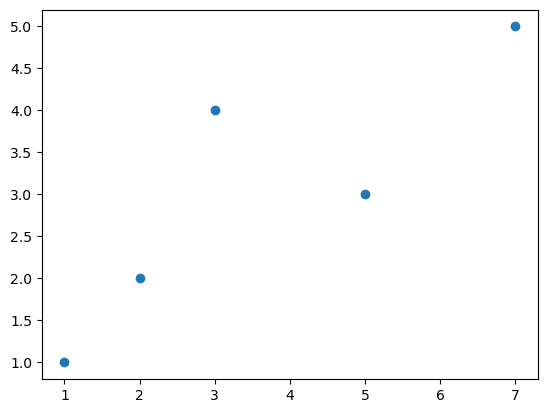

In [92]:
x = np.array([1, 2, 3, 5, 7])
y = np.array([1, 2, 4, 3, 5])

plt.scatter(x, y)
plt.show()

## Explain how we build the matrix and *why* we need to

- How do we think about the rank of A?

In [117]:
A = np.column_stack((np.ones(len(x)), x)) # Turns np arrays into columns of A
b = y.reshape(-1, 1) # Automatically reshapes data into a 2D vector instead of a 1D array

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 5.]
 [1. 7.]]


## Explain the *normal equations* in this statistics method

In [94]:
# Apply orthogonality formula
A_transpose = np.transpose(A)
A_T_A = np.linalg.inv(np.matmul(A_transpose, A))
A_T_b = np.matmul(A_transpose, b)
x_hat = np.matmul(A_T_A, A_T_b)
x_hat

array([[0.98275862],
       [0.56034483]])

## Explain what y1 gives us and why this is p

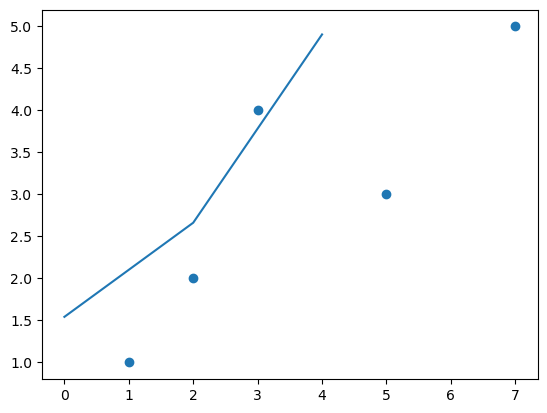

array([1.54310345, 2.10344828, 2.6637931 , 3.78448276, 4.90517241])

In [95]:
y1 = x_hat[1][0]*x + x_hat[0][0]

plt.scatter(x, y)
plt.plot(y1)
plt.show()
y1

In [96]:
p = np.matmul(A, x_hat)
p

array([[1.54310345],
       [2.10344828],
       [2.6637931 ],
       [3.78448276],
       [4.90517241]])

## Explain e and how it's the "residuals" and where does this come from

In [113]:
e = b - p
e

residuals = sum([res[0] * res[0] for res in e])
residuals

2.7155172413793096

In [98]:
assert b.all() == p.all() + e.all() # Confirm the final equation works

## Explain the quick example with numpy lstsq method and it's the same answer but now we know *why* these numbers

- Residuals are the same. Least-squares solution is the same.

In [114]:
alpha = np.linalg.lstsq(A, b, rcond=None)
alpha

(array([[0.98275862],
        [0.56034483]]),
 array([2.71551724]),
 2,
 array([9.57786484, 1.12450215]))